In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patelris/crop-yield-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\shoun\.cache\kagglehub\datasets\patelris\crop-yield-prediction-dataset\versions\1


In [36]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
df=pd.read_csv('yield_df.csv')

In [38]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [39]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [40]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [41]:
df.shape

(28242, 7)

In [42]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [43]:
df.duplicated().sum()

2310

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df["average_rain_fall_mm_per_year"]

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [46]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [47]:
to_drop=df[df["average_rain_fall_mm_per_year"].apply(isStr)].index

In [48]:
df=df.drop(to_drop)

In [49]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


<Axes: xlabel='count', ylabel='Area'>

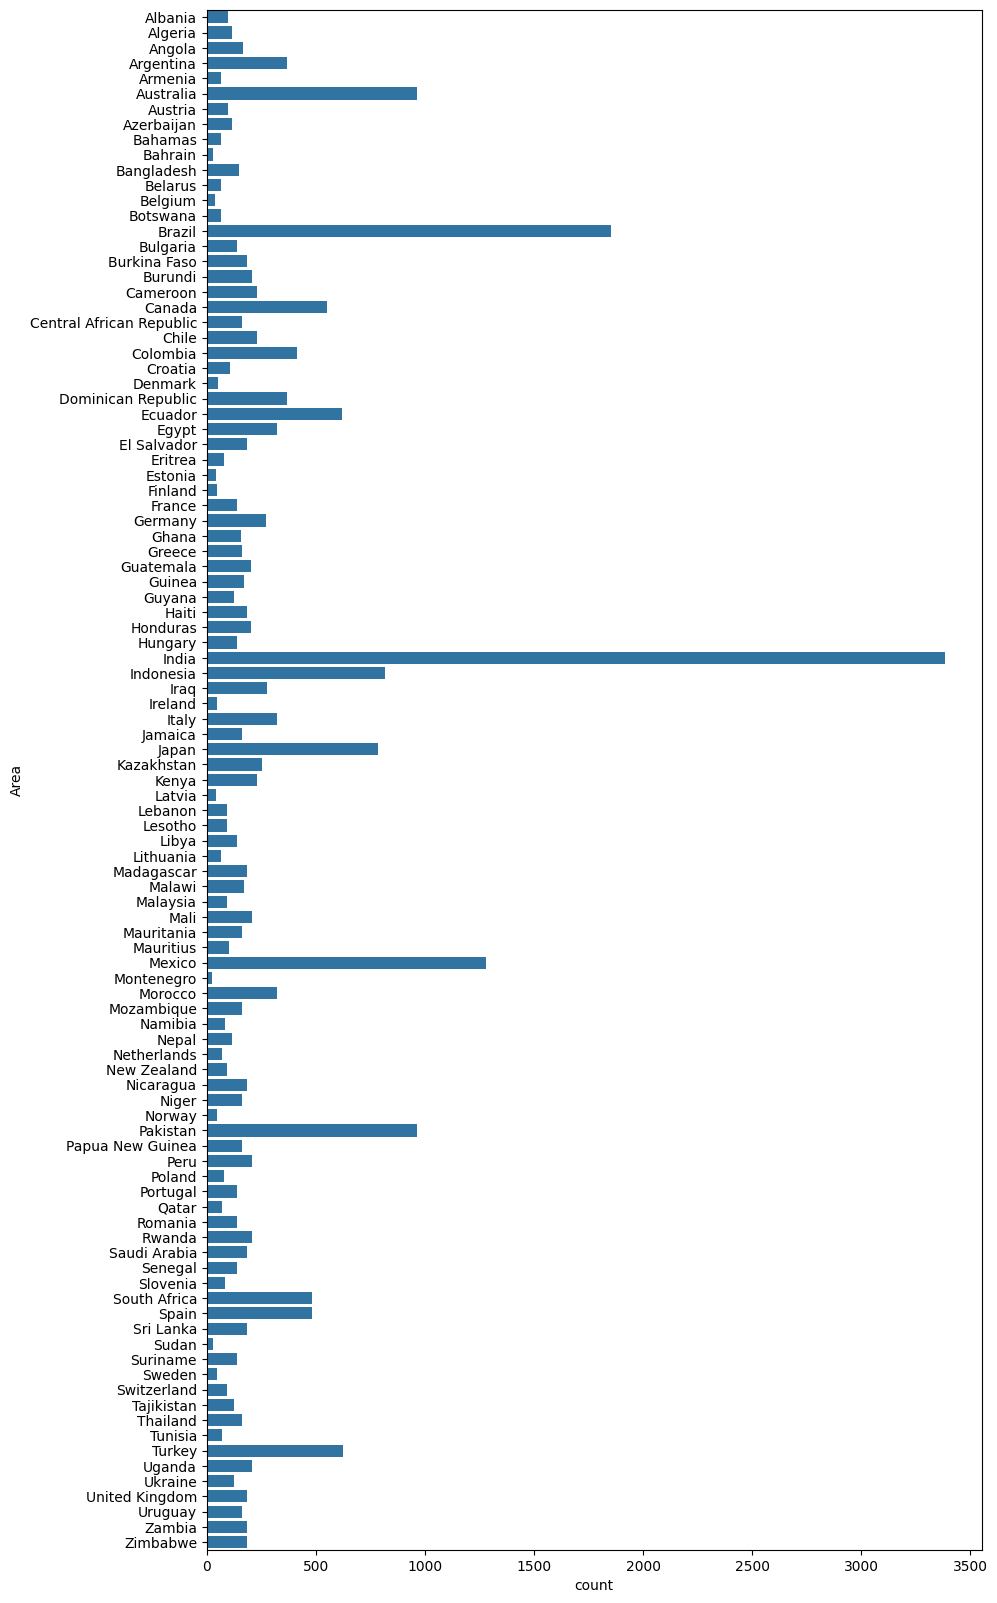

In [50]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

In [51]:
country=(df['Area'].unique())

In [52]:
for a in country:
    print(a)

Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Belarus
Belgium
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cameroon
Canada
Central African Republic
Chile
Colombia
Croatia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Eritrea
Estonia
Finland
France
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Honduras
Hungary
India
Indonesia
Iraq
Ireland
Italy
Jamaica
Japan
Kazakhstan
Kenya
Latvia
Lebanon
Lesotho
Libya
Lithuania
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Montenegro
Morocco
Mozambique
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Norway
Pakistan
Papua New Guinea
Peru
Poland
Portugal
Qatar
Romania
Rwanda
Saudi Arabia
Senegal
Slovenia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Tajikistan
Thailand
Tunisia
Turkey
Uganda
Ukraine
United Kingdom
Uruguay
Zambia
Zimbabwe


In [53]:
yield_per_country = []

for state in country:
    total_yield = df[df['Area'] == state]['hg/ha_yield'].sum()
    yield_per_country.append(total_yield)


In [54]:
# To add the numbers 100, 200, 300, and 400 to the sum
total_sum = df['hg/ha_yield'].sum() + 100 + 200 + 300 + 400
print(total_sum)

1996197943


<Axes: >

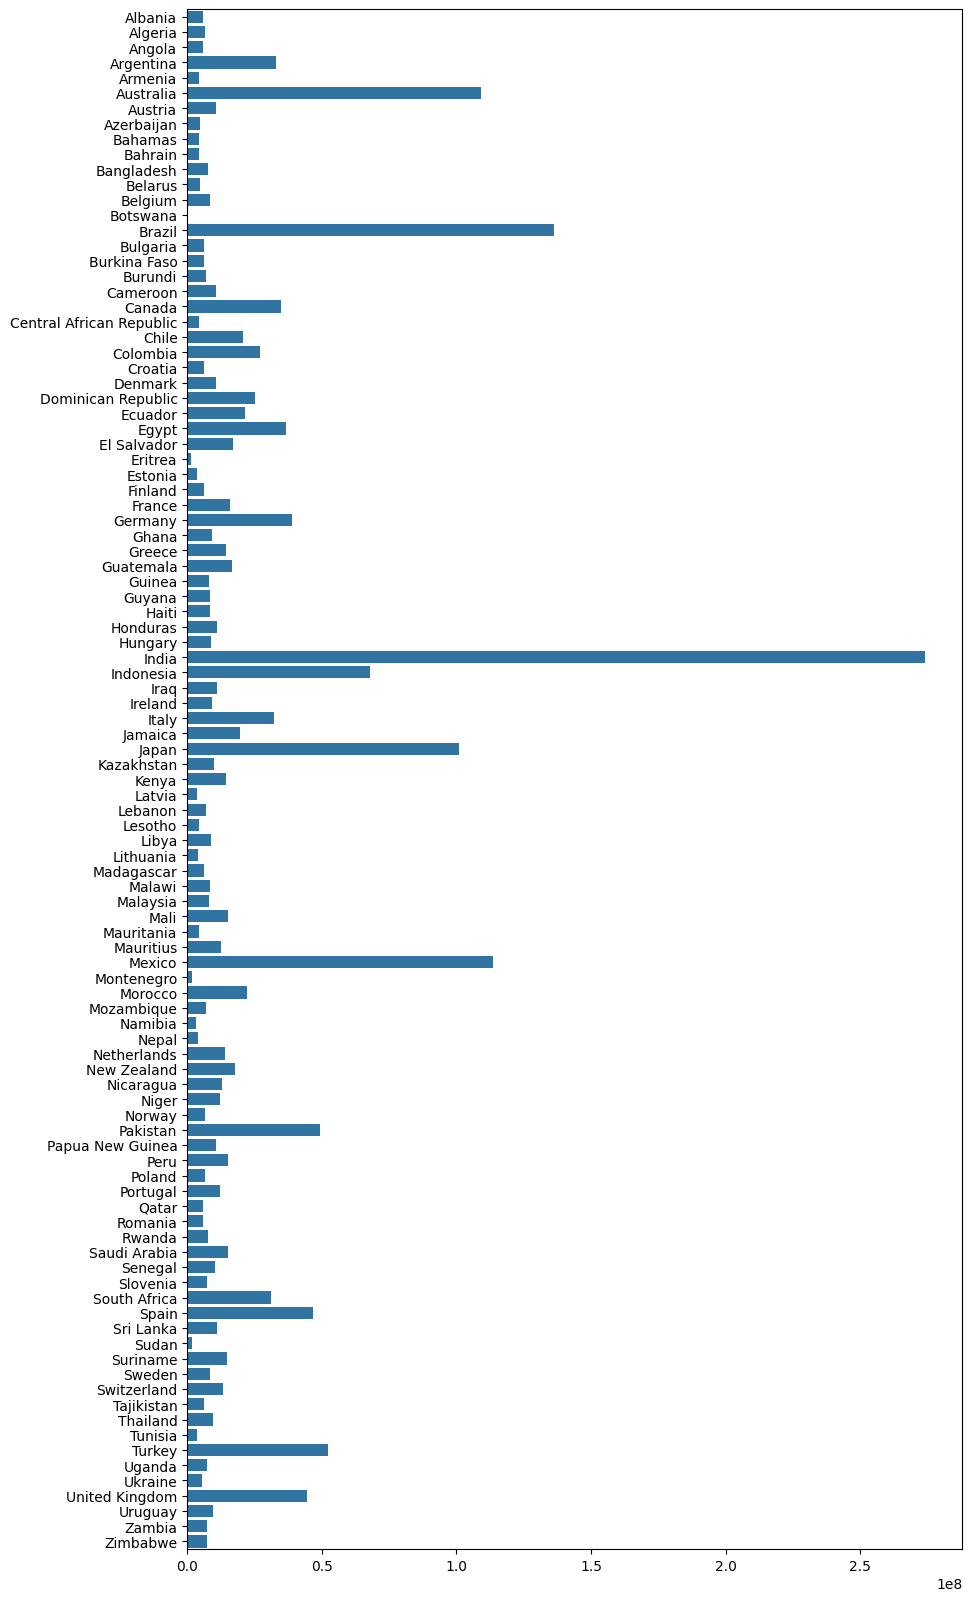

In [55]:
plt.figure(figsize=(10,20))
sns.barplot(y=country,x=yield_per_country)

<Axes: xlabel='count', ylabel='Item'>

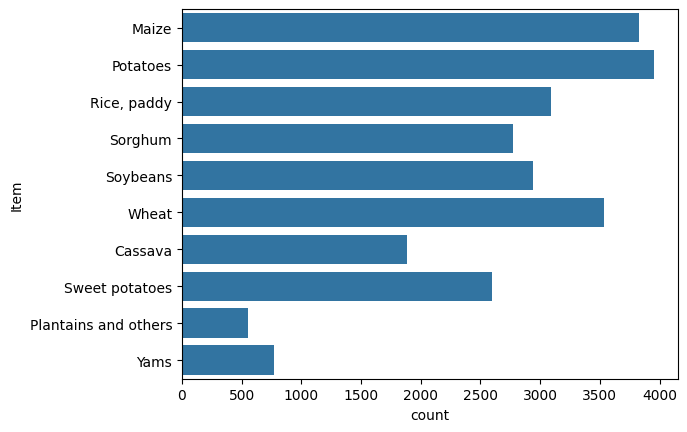

In [56]:
sns.countplot(y=df['Item'])

In [57]:
crops=(df['Item'].unique())

In [58]:
len(crops)

10

In [59]:
yield_per_item=[]
for crop in crops:
    yield_per_item.append(df[df['Item']==crop]['hg/ha_yield'].sum())

In [60]:
yield_per_item

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

<Axes: >

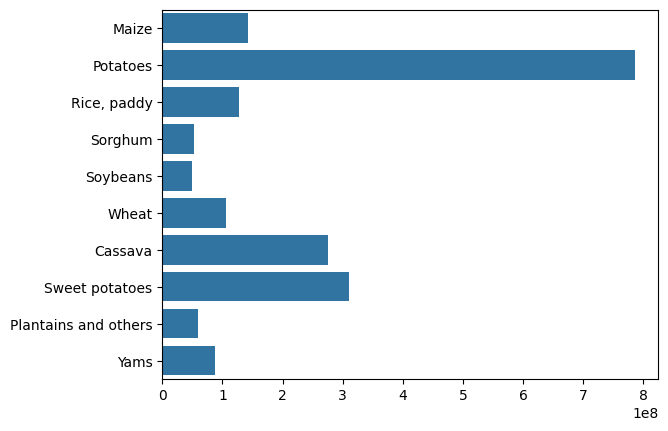

In [61]:
sns.barplot(y=crops,x=yield_per_item)

In [62]:
df


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [63]:
col =['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df=df[col]

In [64]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.00,16.37,Albania,Maize,36613
1,1990,1485.0,121.00,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.00,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [65]:

df=pd.DataFrame(df)


In [66]:
x=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']


In [67]:
from sklearn.model_selection import train_test_split

In [71]:
X_train.shape

(20745, 6)

In [72]:
X_test.shape

(5187, 6)

In [73]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652.0,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240.0,98328.63,27.51,Colombia,Maize
28212,2010,657.0,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410.0,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854.0,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537.0,36572.75,7.85,Canada,Wheat
860,1991,534.0,17866.00,18.73,Australia,Potatoes
17223,1998,250.0,6416.14,6.94,Kazakhstan,Potatoes


In [80]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [81]:
ohe =OneHotEncoder(drop ='first')
scalar =StandardScaler()

In [83]:
preprocessor =ColumnTransformer(
    transformers=[('onehotencoder',ohe,[4,5]),('standrization',scalar,[0,1,2,3])],remainder='passthrough')

In [84]:
preprocessor

,transformers,"[('onehotencoder', ...), ('standrization', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [85]:
X_train_dummy=preprocessor.fit_transform(X_train)
X_test_dummy=preprocessor.transform(X_test)

In [87]:
X_train_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122877 stored elements and shape (20745, 113)>

Training Model


In [89]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Models dictionary
models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'rg': Ridge(),
    'knr': KNeighborsRegressor(),
    'dtr': DecisionTreeRegressor()
}

# Train and evaluate each model
for name, mod in models.items():
    mod.fit(X_train_dummy, y_train)
    y_pred = mod.predict(X_test_dummy)

    print(f"{name} → MSE: {mean_squared_error(y_test, y_pred):.4f}  |  R2 Score: {r2_score(y_test, y_pred):.4f}")


lr → MSE: 1821708860.3688  |  R2 Score: 0.7487


C:\Users\shoun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.317e+10, tolerance: 1.482e+10
  model = cd_fast.sparse_enet_coordinate_descent(


lss → MSE: 1822234158.2996  |  R2 Score: 0.7486
rg → MSE: 1822541699.0231  |  R2 Score: 0.7485
knr → MSE: 127461418.1876  |  R2 Score: 0.9824
dtr → MSE: 157750223.7469  |  R2 Score: 0.9782
